<a href="https://colab.research.google.com/github/huskeypm/foldingML/blob/main/ablim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Notebook for performing polymer modeling in ablim paper

- local cider needed for disorder/charge density predictions
- parameters for model derived from molecular simulations

In [ ]:
!pip3 install localcider


In [36]:
import localcider
from localcider.sequenceParameters import SequenceParameters
from localcider import plots
import re
import os

ModuleNotFoundError: No module named 'localcider'

In [137]:
rev table of observations once more in apper
import numpy as np
import matplotlib.pylab as plt
import numpy as np
import matplotlib.pylab as plt


ABLIM1 seq
MPAFLGLKCLGKLCSSEKSKVTSSERTSARGSNRKRLIVEDRRVSGTSFTAHRRATITHLLYLCPKDYCPRGRVCNSVDPFVAHPQDPHHPSEKPVIHCHKCGEPCKGEVLRVQTKHFHIKCFTCKVCGCDLAQGGFFIKNGEYLCTLDYQRMYGTRCHGCGEFVEGEVVTALGKTYHPNCFACTICKRPFPPGDRVTFNGRDCLCQLCAQPMSSSPKETTFSSNCAGCGRDIKNGQALLALDKQWHLGCFKCKSCGKVLTGEYISKDGAPYCEKDYQGLFGVKCEACHQFITGKVLEAGDKHYHPSCARCSRCNQMFTEGEEMYLQGSTVWHPDCKQSTKTEEKLRPTRTSSESIYSRPGSSIPGSPGHTIYAKVDNEILDYKDLAAIPKVKAIYDIERPDLITYEPFYTSGYDDKQERQSLGESPRTLSPTPSAEGYQDVRDRMIHRSTSQGSINSPVYSRHSYTPTTSRSPQHFHRPGNEPSSGRNSPLPYRPDSRPLTPTYAQAPKHFHVPDQGINIYRKPPIYKQHAALAAQSKSSEDIIKFSKFPAAQAPDPSETPKIETDHWPGPPSFAVVGPDMKRRSSGREEDDEELLRRRQLQEEQLMKLNSGLGQLILKEEMEKESRERSSLLASRYDSPINSASHIPSSKTASLPGYGRNGLHRPVSTDFAQYNSYGDVSGGVRDYQTLPDGHMPAMRMDRGVSMPNMLEPKIFPYEMLMVTNRGRNKILREVDRTRLERHLAPEVFREIFGMSIQEFDRLPLWRRNDMKKKAKLF

ABLIM2 seq
MSAVSQPQAAPSPLEKSPSTAILCNTCGNVCKGEVLRVQDKYFHIKCFVCKACGCDLAEGGFFVRQGEYICTLDYQRLYGTRCFSCDQFIEGEVVSALGKTYHPDCFVCAVCRLPFPPGDRVTFNGKECMCQKCSLPVSVGSSAHLSQGLRSCGGCGTEIKNGQALVALDKHWHLGCFKCKSCGKLLNAEYISKDGLPYCEADYHAKFGIRCDSCEKYITGRVLEAGEKHYHPSCALCVRCGQMFAEGEEMYLQGSSIWHPACRQAARTEDRNKETRTSSESIISVPASSTSGSPSRVIYAKLGGEILDYRDLAALPKSKAIYDIDRPDMISYSPYISHSAGDRQSYGEGDQDDRSYKQCRTSSPSSTGSVSLGRYTPTSRSPQHYSRPGSESGRSTPSLSVLSDSKPPPSTYQQAPRHFHVPDTGVKDNIYRKPPIYRQHAARRSDGEDGSLDQDNRKKSSWLMLKGDADTRTNSPDLDTQSLSHSSGTDRDPLQRMAGDSFHSRFPYSKSDPLPGHGKNGLDQRNANLAPCGADPDASWGMREYKIYPYDSLIVTNRIRVKLPKDVDRTRLERHLSPEEFQEVFGMSIEEFDRLALWKRNDLKKKALLF

MYBPC seq (hairpin)
RSAFRRTSLAGAGRRTSDSHED


* ABLIM1's LIM domains span 97-343
* ABLIM2's LIM domains span 22-270
Aligned sequences using blast




In [ ]:
fastaAblim1='MPAFLGLKCLGKLCSSEKSKVTSSERTSARGSNRKRLIVEDRRVSGTSFTAHRRATITHLLYLCPKDYCPRGRVCNSVDPFVAHPQDPHHPSEKPVIHCHKCGEPCKGEVLRVQTKHFHIKCFTCKVCGCDLAQGGFFIKNGEYLCTLDYQRMYGTRCHGCGEFVEGEVVTALGKTYHPNCFACTICKRPFPPGDRVTFNGRDCLCQLCAQPMSSSPKETTFSSNCAGCGRDIKNGQALLALDKQWHLGCFKCKSCGKVLTGEYISKDGAPYCEKDYQGLFGVKCEACHQFITGKVLEAGDKHYHPSCARCSRCNQMFTEGEEMYLQGSTVWHPDCKQSTKTEEKLRPTRTSSESIYSRPGSSIPGSPGHTIYAKVDNEILDYKDLAAIPKVKAIYDIERPDLITYEPFYTSGYDDKQERQSLGESPRTLSPTPSAEGYQDVRDRMIHRSTSQGSINSPVYSRHSYTPTTSRSPQHFHRPGNEPSSGRNSPLPYRPDSRPLTPTYAQAPKHFHVPDQGINIYRKPPIYKQHAALAAQSKSSEDIIKFSKFPAAQAPDPSETPKIETDHWPGPPSFAVVGPDMKRRSSGREEDDEELLRRRQLQEEQLMKLNSGLGQLILKEEMEKESRERSSLLASRYDSPINSASHIPSSKTASLPGYGRNGLHRPVSTDFAQYNSYGDVSGGVRDYQTLPDGHMPAMRMDRGVSMPNMLEPKIFPYEMLMVTNRGRNKILREVDRTRLERHLAPEVFREIFGMSIQEFDRLPLWRRNDMKKKAKLF'
short = fastaAblim1[343:473]
dshort = short.replace('STS','DTD')
print(dshort)
print(short)
print("STS" in short)


EKLRPTRTSSESIYSRPGSSIPGSPGHTIYAKVDNEILDYKDLAAIPKVKAIYDIERPDLITYEPFYTSGYDDKQERQSLGESPRTLSPTPSAEGYQDVRDRMIHRDTDQGSINSPVYSRHSYTPTTSRS
EKLRPTRTSSESIYSRPGSSIPGSPGHTIYAKVDNEILDYKDLAAIPKVKAIYDIERPDLITYEPFYTSGYDDKQERQSLGESPRTLSPTPSAEGYQDVRDRMIHRSTSQGSINSPVYSRHSYTPTTSRS
True


ABLIM1's disordered N-term region spans 1-97 and C-term region starts after 373

In [ ]:
fastaAblim1Cterm = fastaAblim1[373:]
len(fastaAblim1Cterm)
fastaAblim1Nterm = fastaAblim1[0:97]
index = fastaAblim1.find('MPAF')
print(index) # confirming idx=0

index = fastaAblim1.find('AQPMSSSPKETTF')
print(index)
msssp=fastaAblim1[index:(index+13)]
print( msssp, len(msssp))
msdsp="AQPMSDSPMKETTF"

0
209
AQPMSSSPKETTF 13


## CIDER

In [ ]:
a='RMIHRSTSQGSIN' # contains S450 and S452 sites
data = SequenceParameters(a)
print("Cterm frag fp %4.2f"%data.get_fraction_positive( ) )
print("Cterm frag fn %4.2f"%data.get_fraction_negative() )

b='RMIHRDTDQGSIN'
data = SequenceParameters(b)
print("ppCterm frag fp %4.2f"%data.get_fraction_positive( ) )
print("ppCterm frag fn %4.2f"%data.get_fraction_negative() )

print(msssp)
data = SequenceParameters(msssp)
print("msssp fp %4.2f"%data.get_fraction_positive( ) )
print("msssp fn %4.2f"%data.get_fraction_negative() )

data = SequenceParameters(msdsp)
print("msdsp fp %4.2f"%data.get_fraction_positive( ) )
print("msdsp fn %4.2f"%data.get_fraction_negative() )


Cterm frag fp 0.15
Cterm frag fn 0.00
ppCterm frag fp 0.15
ppCterm frag fn 0.15
AQPMSSSPKETTF
msssp fp 0.08
msssp fn 0.08
msdsp fp 0.07
msdsp fn 0.14


In [ ]:
# mybpc  comparison
mybpcSeq = "RSAFRRTSLAGAGRRTSDSHED" # for frame of reference
data = SequenceParameters(mybpcSeq)
print("mybpc fp %4.2f"%data.get_fraction_positive( ) )
print("mybpc fn %4.2f"%data.get_fraction_negative() )

# C-term
data = SequenceParameters(short)
print("Short C-term fp %4.2f"%data.get_fraction_positive( ) )
print("Short C-term fn %4.2f"%data.get_fraction_negative() )
data = SequenceParameters(dshort)
print("+p Short C-term fp %4.2f"%data.get_fraction_positive( ) )
print("+p Short C-term fn %4.2f"%data.get_fraction_negative() )

# GSK3B seq
data = SequenceParameters(msssp)
data = SequenceParameters(msdsp)

print(msssp)
fp = "MSSSP %4.2f"%data.get_fraction_positive()
fn = "MSSSP %4.2f"%data.get_fraction_negative()
# similar story, though mybpc is even more positively charged
print(fp,fn) # 0.07692307692307693 0.076923076923076 msssp
print(fp,fn) # 0.07142857142857142 0.14285714285714285 msdsp

mybpc fp 0.23
mybpc fn 0.14
Short C-term fp 0.13
Short C-term fn 0.13
+p Short C-term fp 0.13
+p Short C-term fn 0.15
AQPMSSSPKETTF
MSSSP 0.07 MSSSP 0.14
MSSSP 0.07 MSSSP 0.14


entire protein


In [ ]:
data = SequenceParameters(fastaAblim1)
fp = data.get_fraction_positive()
fn = data.get_fraction_negative()

print(fp,fn)

0.14267352185089974 0.11439588688946016


N-terminus/C-terminus

In [ ]:
# n term
data = SequenceParameters(fastaAblim1Nterm)
fp = data.get_fraction_positive()
fn = data.get_fraction_negative()

print(fp,fn)


# c term
data = SequenceParameters(fastaAblim1Cterm)
fp = data.get_fraction_positive()
fn = data.get_fraction_negative()

print(fp,fn)


# c term + phospho
# just a hack since we are adding two charges
pfastaAblim1Cterm = re.sub("S", "D", fastaAblim1Cterm, count=2)
data = SequenceParameters(pfastaAblim1Cterm)
fp = data.get_fraction_positive()
fn = data.get_fraction_negative()

print(fp,fn)



0.17525773195876287 0.08247422680412371
0.14814814814814814 0.13333333333333333
0.14814814814814814 0.1382716049382716


### Hofman applications of flory ideas
Ideas from Hofman paper (supplement) for determining attractive/repulsive corrections to scaling coefficient $\nu$

Populating values for Flory model

$
\begin{align}
R_g & = \sqrt{ \frac{2\xi b}{\left(2\nu+1\right)\left(2\nu+2\right)}} N^\nu \\ % S11 hofmann
\nu & = \nu_0 + \nu^*\\
\nu^* &= \frac{4\pi\lambda_B\left( f-g \right)^2}{\kappa^2} - \frac{\pi\lambda_B^2 (f+g)^2}{\kappa}
\end{align}
$
    Per Hofmann supp, $\nu^*>0$ pertains to net repulsion (unfolding) while $\nu<0$ corresponding to net attraction (folding).

* $b=0.38 \mbox{ [nm] bond length}$
* $l_p=0.4 \mbox{ [nm] pers. len, hofman}$
* $\lambda_B = 0.7 \mbox{ [nm] Bjerrum length for er=80, check w my notes}$
* $\kappa = 1.0 \mbox{ [nm] Inv. Debye}$
* $f_- = 0.105 \mbox{ frac -,w/o phospho}$
* $f_+ = 0.134 \mbox{ frac +,w/o phospho}$
* $v_0 = 0.6 \mbox{ excluded volume chain, ref. in Hofmann}$




In [ ]:
#  net repulsive if > 0, net attractive if < 0
def vexcess(fp,fm):
    lB=k=1.

    t1 = (4*np.pi*lB)*(fp-fm)**2
    t1/=k**2
    #print(t1)
    t2 = (np.pi*lB*lB)*(fp+fm)**2
    t2/=k
    #print(t2)
    vs = t1-t2
    #print(vs)
    return vs

In [ ]:
# values from the fp/fn calculations earlier
print( vexcess(1,0) )
print( vexcess(0.148,0.133 ) )
print( vexcess(0.148,0.143 ) )


9.42477796076938
-0.2452358641318729
-0.26571904823327824


In [5]:
# Validated against Fig 2 in Hofmann et al
b = 0.38 # nm [from Hofmann]
lp = 0.4 # nm
def rg(n,nu):
    num = 2*lp * b
    denom = (2*nu+1)*(2*nu+2)
    scale = np.sqrt(num/denom)*(n**nu)
    return scale




#rg(1000,0.58)
# Protein IN (left bottom panel) appears to have Nbond=60, and Rg of about 2. and a scaling
# exponent of 0.58. The expression below reproduces this number
print("IN Rg%f"%rg(60,0.58))
print( rg(133,0.58) )
#print( nFrag )
#133**0.58

IN Rg2.268267
3.5991531473172373


proTa Rg: 2.957244692388829
-p Rg MD: 5.3 pred: 5.251607017167511
+p Rg MD: 4.8 pred: 4.774925509292746


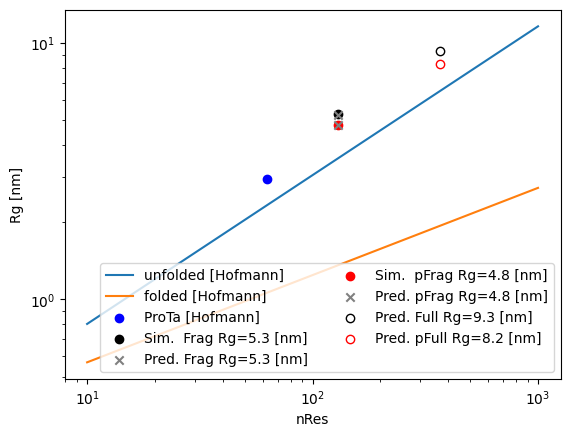

In [131]:
nval =  10**np.linspace(1,3,20)
nval = np.array(nval,dtype=int)

nu = 0.58 # unfolded (based on Fig 2 Hofmann validation above and within its plots)
plt.plot(nval, rg(nval,nu),label='unfolded [Hofmann]')
nu = 0.34 # folded (based on Fig 2, within its plots nu is given)
plt.plot(nval, rg(nval,nu),label='folded [Hofmann]')


plt.ylabel('Rg [nm]')
plt.yscale('log')
plt.xlabel('nRes')
plt.xscale('log')
plt.legend(loc=0)

# reference plt.scatter([1000],[rg(1000,nu)],edgecolor='orange',facecolor='white')
# according to 6A, proT53 has a net charge of 0.3, vs 0.4 for proTa, IN is about 0.15
# i'm guess netcharge has a maximum of 1.0 from (f^+ - f^-)
# from 2 it looks ilke IN has v=0.58 and proTA = 0.67
# i can't really figure out what numbers were used for the net charge listed in the hofmann paper, though they did seem to include
# the net charges of the fluorophores


nResCterm = 300
# ratio of pos/neg. aa in ablim are pretty even (+40/300 vs -31/300), but they're slightly positive overall (9/300). Let's assume this gives us
# a nu=0.61. promotyhsin a had about 5 more positive aa over 50ish residues and had nu=0.67 Adding 3 phosphates (-2x3) will almost balance positive w negative, so we'll use nu=0.58

# The region spanning LIM4 (343) and VHP (710) is 366 residues (to 709)
# The short fragment we simulated was 130
nFrag = 473 - 343
nFull=709 - 343

# hofmann
nProTa = 54+9 # for the FRET linker (see fig 2 caption)
nuHoff=0.65 # 70 #
val = rg(nProTa,nuHoff)
print(f"proTa Rg: {val}")
plt.scatter([nProTa],[val], label="ProTa [Hofmann] ", # Rg=%3.1f [nm]"%val,
            facecolor='blue',edgecolor='blue')


# unphospho
# based on figure 9B
simVal = 5.3 # Rg 53 A
plt.scatter([nFrag],[simVal], label="Sim.  Frag Rg=%3.1f [nm]"%simVal,facecolor='k',edgecolor='k')
# Pred
nu=0.675 # estimated by where ProtTa fell, incr. slightly to align w MD sim; moving since charge density is different
val = rg(nFrag,nu)
print(f"-p Rg MD: {simVal} pred: {val}")
plt.scatter([nFrag],[val], label="Pred. Frag Rg=%3.1f [nm]"%val,marker='x',facecolor='gray')

# phospho
# based on figure 9B
simVal = 4.8 # update
plt.scatter([nFrag],[simVal], label="Sim.  pFrag Rg=%3.1f [nm]"%simVal,facecolor='r',edgecolor='r')
# corr
nup=0.652; diff = nu - nup
val = rg(nFrag,nup)
print(f"+p Rg MD: {simVal} pred: {val}")
plt.scatter([nFrag],[val], label="Pred. pFrag Rg=%3.1f [nm]"%val,marker='x',facecolor='gray')

# full
# unphospho
nuF=nuHoff  # using ProTa value
val = rg(nFull,nuF)
plt.scatter([nFull],[val], label="Pred. Full Rg=%3.1f [nm]"%val,facecolor='w',edgecolor='k')

# phospho
nupF = nuF - diff
val = rg(nFull,nupF)
plt.scatter([nFull],[val], label="Pred. pFull Rg=%3.1f [nm]"%val,facecolor='w',edgecolor='r')

plt.legend(loc=4,ncol=2)
plt.gcf().savefig('rg.png',dpi=600)


### Alston paper using Flory scaling
https://pubs.acs.org/doi/full/10.1021/acs.jpcb.3c01619

$D = A_0 N^\nu$

Figure below was validated against their Fig 1d by fitting their data to get an estimate for $A_0$



Did a quick estimate of $a_0$ based on the expression
$\langle r_e \rangle = a_0 N^\nu$ for the end-to-end distance dsimulation data


Data (re**2) seems to match that presented in Fig 10

To fit $r_i = a_0 N^{\nu_i}$ with an intercept of 0, we can do
\begin{align}
y &= a_0 x \\
x\cdot y &= x\cdot(a_0 x)\\
&= a_0 x\cdot x\\
⇒ \sum{xy} &=  a_0\sum{xx}\\
⇒a_0 &= \frac{\sum{xy}}{\sum{xx}}
\end{align}

6.0034692133618845 [ 7.07106781 10.        ] [42.5 60. ]
2.680101552905778


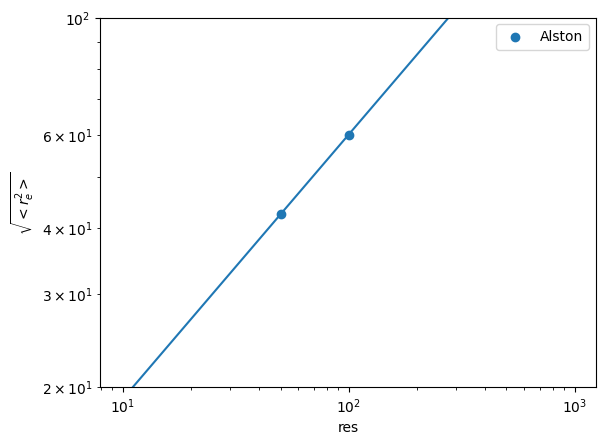

In [138]:
Ns = (np.arange(99)+1)*10
nua = 0.5 # from Alston paper

# fig 1d
Na = np.array([50,100])
xa = Na**nua
ya = np.array([42.5,60])
a0a = np.dot(xa,ya)/np.dot(xa,xa)
print(a0a,xa,ya)


# from Fig 1f Alston
A0 = 60./(100.**nu)
print(A0)

#
sqrt_re2 = a0a * (Ns**nua)


plt.plot(Ns,sqrt_re2 )
plt.xlabel('res')
plt.ylabel('$\sqrt{<r_e^2>}$')
plt.xscale('log')
plt.yscale('log')
plt.ylim([20,100])

plt.scatter(Na,ya,label='Alston')
plt.legend(loc=0)

## mock data



In [145]:
#draw random numbers from histogram
n = 1000
r = np.random.randn(n) * 5


data = dict()
data['wt'] = r + 175
data['d'] = r + 125
#data['p'] = r + 125


#plt.hist(data['wt'])
#plt.hist(data['d'])

## Real data
# <font color=red>NOT THE RIHT DATA!!! Need to upload data</font>

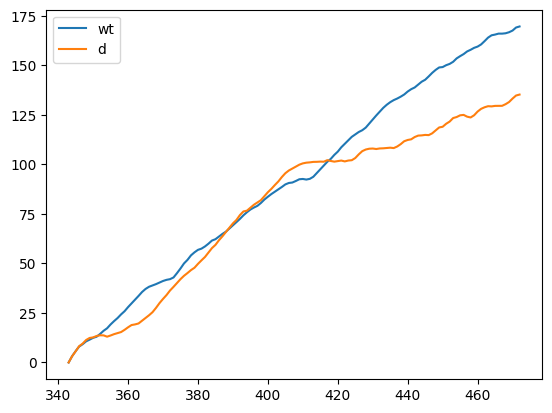

In [91]:
data = dict()
data['wt'] = np.loadtxt('built_wt_Re_Cterm.csv')
data['d'] = np.loadtxt('built_s450d_s452d_R_e_Cterm.csv')
#data['p'] = np.loadtxt('built_s450pS_s452pS_R_e_Cterm.csv')

rstart = 343
inds = np.arange(len(data['wt'])) + rstart

plt.plot(inds,data['wt'],label='wt')
plt.plot(inds,data['d'],label='d')
#plt.plot(inds,data['p'],label='p')
plt.legend(loc=0)

wt mean=175.035525 (166.497206,183.099593)
d mean=125.035525 (116.497206,133.099593)


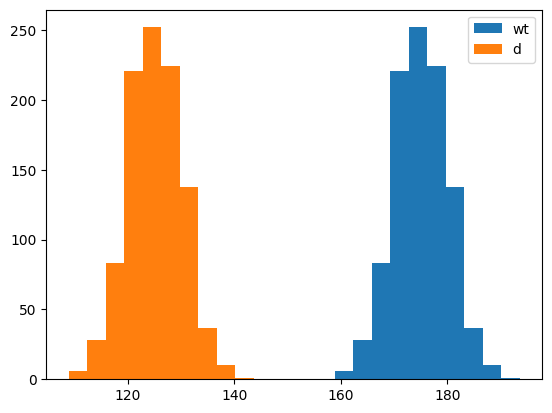

In [143]:


for key in data.keys():
    sorted_data = np.sort(data[key])
    # Calculate the 5th percentile
    p5 = np.percentile(sorted_data, 5)

    # Calculate the 95th percentile
    p95 = np.percentile(sorted_data, 95)
    plt.hist(data[key],label=key)

    # report
    print(f"{key} mean=%f (%f,%f)"%
          (np.mean(data[key]),p5,p95)
    )

plt.legend(loc=0)

Drew 100 samples.
--------------------
Drew 100 samples.
--------------------


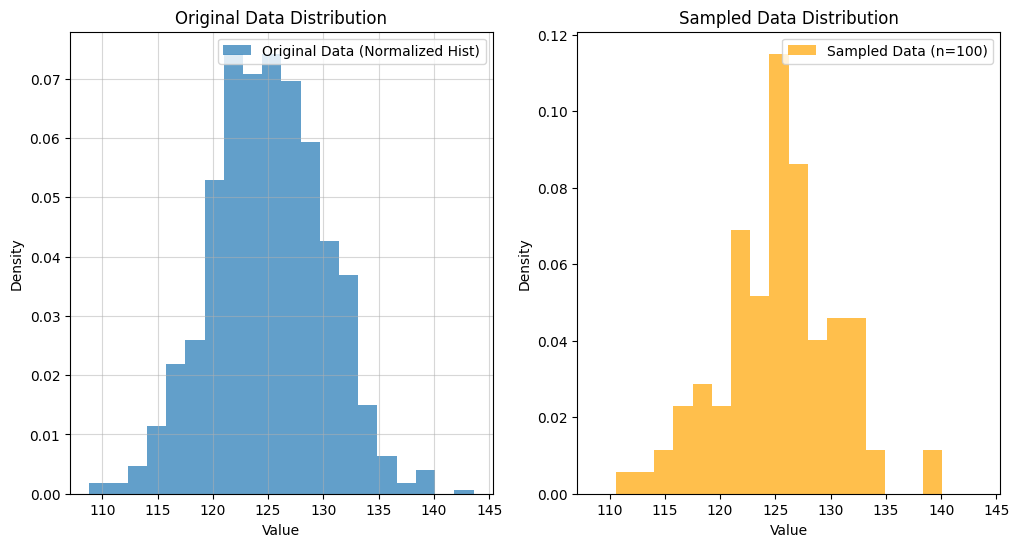

In [144]:
def sample_from_histogram(hist_counts, bin_edges, n):
    """
    Draws n random samples from a distribution defined by a histogram.

    Args:
        hist_counts (array-like): The counts (frequencies) in each bin.
                                   Must have length M.
        bin_edges (array-like): The edges of the bins. Must have length M+1.
        n (int): The number of samples to draw.

    Returns:
        numpy.ndarray: An array of n sampled points.
    """
    # --- Input Validation ---
    if len(hist_counts) != len(bin_edges) - 1:
        raise ValueError("Length of hist_counts must be one less than length of bin_edges.")
    if np.any(np.array(hist_counts) < 0):
         raise ValueError("Histogram counts cannot be negative.")
    if n <= 0:
        return np.array([]) # Return empty if n is zero or negative

    # --- Calculate Probabilities ---
    # Ensure counts are float for division
    hist_counts = np.asarray(hist_counts, dtype=float)
    total_counts = hist_counts.sum()

    if total_counts == 0:
         # Handle case where histogram is empty or all counts are zero
         # Option 1: Return empty array
         # return np.array([])
         # Option 2: Raise error
         # raise ValueError("Total histogram counts are zero, cannot sample.")
         # Option 3: Return NaNs or default values (less ideal)
         # return np.full(n, np.nan)
         # For this example, let's raise an error if sampling is impossible.
         raise ValueError("Cannot sample from a histogram with zero total counts.")


    bin_probabilities = hist_counts / total_counts

    # --- Choose Bin Indices ---
    # Create an array of bin indices [0, 1, ..., M-1]
    bin_indices = np.arange(len(hist_counts))
    # Choose n bin indices based on their probabilities
    chosen_bin_indices = np.random.choice(bin_indices, size=n, p=bin_probabilities)

    # --- Sample Within Chosen Bins ---
    # Get the left and right edges for each chosen bin index
    # Ensure bin_edges is a numpy array for fancy indexing
    bin_edges = np.asarray(bin_edges)
    left_edges = bin_edges[chosen_bin_indices]
    right_edges = bin_edges[chosen_bin_indices + 1]

    # Generate n random numbers uniformly between 0 and 1
    uniform_randoms = np.random.rand(n)

    # Scale and shift these random numbers to fit within the chosen bins
    # Sample = LeftEdge + RandomFraction * BinWidth
    sampled_points = left_edges + uniform_randoms * (right_edges - left_edges)

    return sampled_points

# --- Example Usage ---

# 1. Define or Generate a Histogram
# Example: Create some data and get its histogram
num_samples_to_draw = 100
sampled = dict()
for key in data.keys():
  original_data = data[key]
  # Get histogram data using numpy
  hist_counts, bin_edges = np.histogram(original_data, bins=20, density=False)
  # Note: Using density=False gives actual counts, which is what our function expects.
  # If you used density=True, you'd need to convert density back to probability
  # by multiplying density by bin width.


  #print("Original Histogram Counts:", hist_counts)
  #print("Original Bin Edges:", bin_edges)
  #print("-" * 20)

  # 2. Sample points based on the histogram
  #num_samples_to_draw = 10000

  sampled_data = sample_from_histogram(hist_counts, bin_edges, num_samples_to_draw)
  sampled[key] = sampled_data
  #
  print(f"Drew {len(sampled_data)} samples.")
  # print("First few samples:", sampled_data[:10]) # Optional: view samples
  print("-" * 20)


#### just plot for one
# 3. Visualize (Optional but Recommended)
plt.figure(figsize=(12, 6))

# Plot the original histogram (normalized)
plt.subplot(1, 2, 1)
plt.hist(original_data, bins=bin_edges, density=True, alpha=0.7, label='Original Data (Normalized Hist)')
plt.title("Original Data Distribution")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.grid(True, alpha=0.5)


# Plot the histogram of the sampled points (normalized)
plt.subplot(1, 2, 2)
# Use the same bin edges for direct comparison
plt.hist(sampled_data, bins=bin_edges, density=True, alpha=0.7, color='orange', label=f'Sampled Data (n={num_samples_to_draw})')
plt.title("Sampled Data Distribution")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()

## Extrapolate to full length.
Although earlier we computed the nu values based on the mean Rg, we recompute them here in order to generate a unique value for each point underlying the Rg distribution



### Compute a_0
- R_0 in the text
- uses approach from Alton validation above

In [185]:
# sim ?????
#Nsim=130 - 1

# re=170, v=0.66, N=130 ---> a=6.84 (how compares to halston?)
# re=130, v=0.63, N=130 ---> a=5.76
# avg ~ 6.2
# re ]
rewt = np.median( sampled['wt'] )
rep = np.median( sampled['d'] )
#rewt = 170
#rep=130
print(rewt,rep)
x = np.array([nFrag**nup,nFrag**nu])
y = np.array([rep,rewt])
a0 = np.dot(x,y)/np.dot(x,x)
print(f"R_0: {a0} for",x,y)

# Perform linear fit




Ns = np.arange(nFull)+1
#a0=6.7
# WT
#nu = 0.66 # WT
print(nu)
re_wt = a0*Ns**nu


# p
#nu = 0.64 # WT
re_p = a0*Ns**nup

if 0:
  plt.plot(Ns,re_wt,'k-',label='Pred WT')
  plt.plot(Ns,re_p,'r-',label='Pred +P')
  predWT = a0*nFrag**nu
  predp=a0*nFrag**nup
  print(f"WT: {predWT}, p: {predp}")
  plt.scatter([nFrag],[rewt],label="Sim wt")
  plt.scatter([nFrag],[rep],label="Sim p")
  plt.legend(loc=0)
  plt.yscale('log')
  plt.xscale('log')

174.78390247439924 125.51098494145486
R_0: 5.968252338578967 for [23.89412139 26.72463379] [125.51098494 174.78390247]
0.675


In [186]:
def extrap(reShort,a0term,Nshort,Nlong,verbose=False):
  """
  Extrapolates the radius of gyration (Rg) of a polymer chain from a shorter
  segment to a longer one using Flory scaling.

  This function assumes the relationship Rg = a_0 N^nu, where Rg is the radius of
  gyration, N is the number of residues or chain length, and nu is the Flory
  exponent. It uses the known Rg of a short segment to determine the Flory
  exponent and then applies this exponent to predict the Rg of the longer chain.

  Args:
    reShort (float): The radius of gyration of the shorter chain segment.
    a0term (float): coefficient, which needs to be estimate from the data
    Nshort (int): The number of residues in the shorter chain segment.
    Nlong (int): The number of residues in the longer chain.

  Returns:
    float: The predicted radius of gyration (Rg) of the longer chain segment.
  """

  # rg = a0 N**nu
  reScale = reShort / a0term
  nuEff = np.log(reScale) / float(np.log(Nshort))
  reLong = a0term * Nlong**nuEff
  if verbose:
    print(f"a0: {a0term} Re Short: {reShort} NShort : {Nshort} l: {Nlong} nu: {nuEff}")
  return reLong

# verified that these are reasonable PKH 250415
a0trial = 1.
a0trial = a0 # [Ang]
reWT =174.78390247439924
rep = 125.51098494145486
print(f"Validate ",extrap(reWT,a0trial,nFrag,nFrag))

print(f"extrap wt ",extrap(reWT,a0trial,nFrag,nFull,verbose=True))
print(f"extrap p ",extrap(rep,a0trial,nFrag,nFull,verbose=True))
#print(a0)


Validate  174.78390247439927
a0: 5.968252338578967 Re Short: 174.78390247439924 NShort : 130 l: 366 nu: 0.6938001689163336
extrap wt  358.4188045246581
a0: 5.968252338578967 Re Short: 125.51098494145486 NShort : 130 l: 366 nu: 0.6257663240430031
extrap p  239.8762840134091


130
174.78390247439924 358.4188045246581
125.51098494145486 239.8762840134091


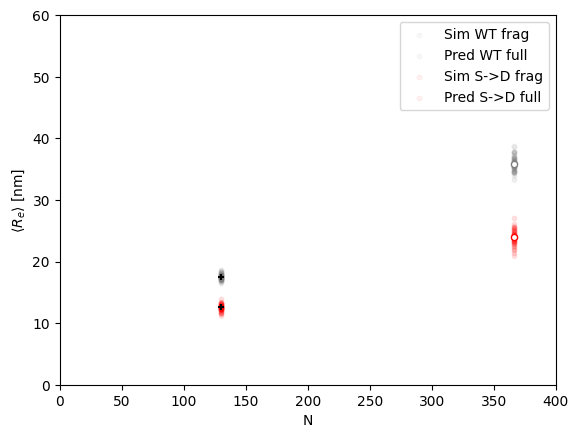

In [190]:
### sim 1 (using rv1, ev1) - Red
aa_to_nm = 0.1
n = nFrag
print(n)
#key = 'd'
colors = ['gray','red','blue']
labs1 = ['Sim WT frag','Sim S->D frag']
labs2 = ['Pred WT full','Pred S->D full']
w=0

reVals = dict()

for key in sampled.keys():

  data = sampled[key]
  rv1 = np.zeros([2, np.shape(data)[0]])
  v = nFrag #+ w*4
  rv1[0,:] = v
  rv1[1,:] = data
  col = colors[w]
  w+=1


  # Plot all data points with transparency
  plt.scatter(rv1[0,:],rv1[1,:]*aa_to_nm,facecolor=col,s=10,alpha=0.05, label=labs1[w-1])
  sorted_data = np.sort(sampled[key])
  # Calculate the 5th percentile
  p5 = np.percentile(sorted_data, 5)
  # Calculate the 50th percentile
  p50 = np.percentile(sorted_data, 50)
  # Calculate the 95th percentile
  p95 = np.percentile(sorted_data, 95)




  #plt.scatter([v,v,v],np.array([p5,p50,p95])*aa_to_nm,marker='+',color='black',s=20) # facecolor='black',s=10)
  reVals[key] = np.array([p50])*aa_to_nm
  plt.scatter([v],[reVals[key]],marker='+',color='black',s=20) # facecolor='black',s=10)

  ## extrap'd 1 (using ev1) - Red
  ev1 = np.zeros_like( rv1 )
  ev1[0,:] = nFull
  #ev1[1,:] = 100 + rv1[1,:]
  ev1[1,:] = extrap(rv1[1,:],a0,nFrag,nFull)
  print(p50,extrap(p50,a0,nFrag,nFull))

  # Plot all extrapolated data points with transparency
  plt.scatter(ev1[0,:],ev1[1,:]*aa_to_nm,facecolor=col,s=10,alpha=0.05, label=labs2[w-1])
  # Plot mean of the second dimension for the first extrapolated data point (white center)
  reVals[key+'_ext'] = np.median( ev1[1,:] )*aa_to_nm
  plt.scatter([ev1[0,0]],[reVals[key+'_ext']],facecolor='white',edgecolor=col,s=20)#, label='Mean ev1[1,:]')


  #plt.plot([0,nFull],[0,522] )
plt.xlim([0,400])
plt.ylim([0,60])
#plt.yscale('log')
plt.legend(loc=0)
plt.ylabel(r"$\langle R_e\rangle$ [nm]")
plt.xlabel('N')
plt.gcf().savefig("scaling.png",dpi=600)

assuming gaussian chain for p(r)
looks qualitatively similar to Fig 1f (Alston)

$P(r) = 4 \pi r^2
\left( \frac{3}{2 \pi \langle r_e^2 \rangle} \right)^{3/2}
\exp\left( -\frac{3r^2}{2 \langle r_e^2 \rangle}\right)
$


42.873345710184346
73.77186477217029
112.47495966267412


Text(0.5, 1.0, 'validation')

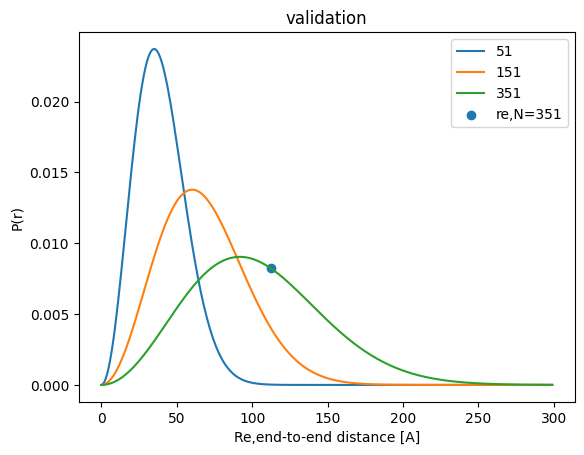

In [188]:
import numpy as np
def pr(r,re_sqd):
    t1 = 4*np.pi * r**2
    t2 = (3/(2*np.pi*re_sqd))**(1.5)
    expt = (3*r*r)/(2*re_sqd)
    t3 = np.exp(-expt)
    return t1*t2*t3



rs = np.arange(0,300)

Ns = 51
sqrt_re2 = a0a * (Ns**nua)
print(sqrt_re2)
re2 = sqrt_re2**2
plt.plot(rs,pr(rs,re2),label=Ns)
#plt.scatter(sqrt_re2,pr(sqrt_re2,re2),label=Ns)

Ns = 151
sqrt_re2 = a0a * (Ns**nua)
print(sqrt_re2)
re2 = sqrt_re2**2
plt.plot(rs,pr(rs,re2),label=Ns)


Ns = 351
sqrt_re2 = a0a * (Ns**nua)
print(sqrt_re2)
re2 = sqrt_re2**2
plt.plot(rs,pr(rs,re2),label=Ns)
plt.ylabel('P(r)')
plt.xlabel('Re,end-to-end distance [A]')
plt.scatter(sqrt_re2,pr(sqrt_re2,re2),label=f"re,N={Ns}")
plt.legend(loc=0)
plt.title("validation")

Application to ABLIM1 numbers
* Assuming A0 determined earlier
* Sorenson paper indicates that net charge densities approaching 0.15 gives eff conc 3v=1.75 --> v=0.58 vs maybe 3v=1.6--> 0.53 for densities < 0.02


try using shading i used way below

In [ ]:
750-373

377

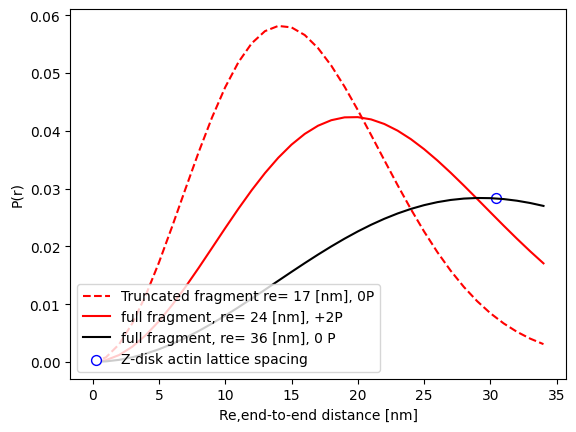

In [205]:
rs = np.arange(0,35) # [nm]

# change in phospho might move from say 0.25 to 0.3, or 0.05 change
#Ns = nFrag
#sqrt_re2 = A0 * (Ns**nup)
#print(sqrt_re2)
#re2 = sqrt_re2**2'
reTrunc = reVals['wt'] # nm_to_aa, 170 # before
re2 = reTrunc**2
plt.plot(rs,pr(rs,re2),'r--',label=f'Truncated fragment re=%3.0f [nm], 0P'% reTrunc[0])



#Ns = full
#sqrt_re2 = A0 * (Ns**nuPhospho)
#print(sqrt_re2)
#re2 = sqrt_re2**2
repfull = reVals['d_ext'] # 276 # before
re2 = repfull**2
plt.plot(rs,pr(rs,re2),'r-',label=f'full fragment, re=%3.0f [nm], +2P'%repfull)
plt.ylabel('P(r)')
plt.xlabel('Re,end-to-end distance [A]')

#sqrt_re2 = A0 * (Ns**nuUnphospho)
#print(sqrt_re2)
#re2 = sqrt_re2**2
rewtfull = reVals['wt_ext']  # 311 # before
re2 = rewtfull**2
plt.plot(rs,pr(rs,re2),'k-',label=f'full fragment, re=%3.0f [nm], 0 P'%rewtfull)
plt.legend(loc=0)
plt.ylabel('P(r)')
plt.xlabel('Re,end-to-end distance [nm]')


b=30.4 # 30 nm --> 300 AA for actin/actin separation, dz from Irving 2011
plt.scatter(b,pr(b,re2),label='Z-disk actin lattice spacing',s=50,edgecolor='blue',facecolor='white')
plt.legend(loc=3)
#plt.title('our data for ablim1 [UNORMALIZZED]')
plt.gcf().savefig("pr_sim.png",dpi=300)

## Previously

## Van valen application of  Worm like chain model
(WLC is probabli not the best fit for IDPs or our data)


Assuming here that
* villin headpiece remains bound to actin
* LIMs 2 and 3 are available to bind titin
* LIMs 2 and 3 availability are modulated by MSSSP phosphorylation (between LIMs 2 and 3)

The WLC chain uses the persistence length, $\zeta$, which is approximately $b/2$ (I believe b is the width of an aa, roubhly 3.4) to give the mean squared end-to-end distance (\eqn{eqn:r3}):

Usintg the Rend equation

\begin{equation}
\langle R^2 \rangle = 2 \zeta L_0 \left[ 1 - \frac{\zeta}{L_0}\left(1- \exp(-L_0/\zeta)\right)\right]
\end{equation}
where $L_0 = N L_b$ with $L_b$ and $N$ representing the length of an amino acid and the number of amino acids, respectively. \mnote{verify b and Lb relationshuip}



In [ ]:
zeta = 0.35 #persistence length [nm]
lenPerResi = 0.34 # [nm]
#D = 53 *lenPerResi   # Residue between CaMBR C termimus (R414) and AID N-terminus (I467) is 52 a.a.
                     # thus the distance should be 3.4 x 53
#L = 8 * lenPerResi  # residue number between C-terminal of DH and N terminus of AID (DH is absorbed on CaM's surface)

# for the effective concentration
def G_DZL(zeta,D,L):
    prefac = np.sqrt(3/(4*np.pi*zeta*L))
    prefac =prefac*prefac*prefac
    expon = -3*D*D/(4*zeta*L)
    return prefac * np.exp(expon)

# for R**2, see Eqn 5 in the mapid paper
def RR_ZL(zeta,L):
    L = float(L)
    prefac = 2*zeta * L
    expon = np.exp(-L/zeta)
    expon = (zeta/L) * (1-expon)
    expon = 1 - expon
    return prefac * expon

RR_ZL = np.vectorize( RR_ZL )

In [ ]:
# prompt: twiny plot example

fig, ax1 = plt.subplots()

ax1.plot([1, 2, 3], [1, 2, 3], label='plot 1')
ax1.set_xlabel('x-axis')
ax1.set_ylabel('y-axis 1')

ax2 = ax1.twinx()  # Create a twin y-axis
ax2.plot([1, 2, 3], [4, 5, 6], color='red', label='plot 2')
ax2.set_ylabel('y-axis 2')

# Combine legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()


Text(0.5, 0, 'Num. aa')

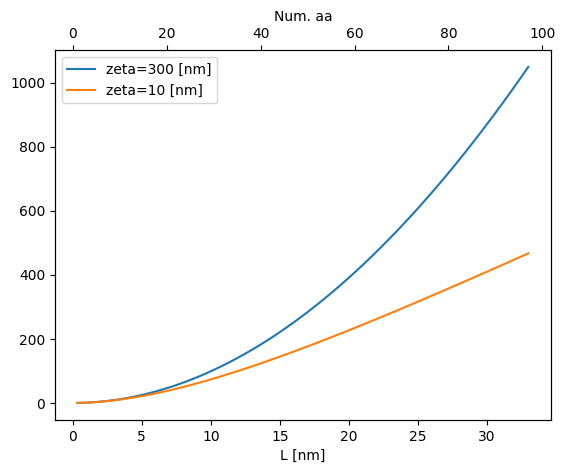

In [ ]:
fig,ax = plt.subplots()


nRes = np.linspace(1,97)
Ls = nRes * lenPerResi # [nm]
zeta = 300 # [nm]
rr = RR_ZL(zeta,Ls)
ax.plot(Ls,rr, label=f"zeta={zeta} [nm]")

zeta = 10 # [nm]
rr = RR_ZL(zeta,Ls)
ax.plot(Ls,rr, label=f"zeta={zeta} [nm]")
ax.set_xlabel("L [nm]")
ax.legend()

axt = ax.twiny()
axt.plot(nRes,rr,lw=0)
axt.set_xlabel("Num. aa")

These all need to be double checked relative to the original Shoemaker(?) and Philips paper.

In [ ]:
Ang_to_nm = 0.1
Ang_per_res = 3.4 # [A]

D = 40*2 * Ang_to_nm # about 40 Ang across for 2 LIM domains
print (D, " [nm]")


aaNterm = 98
L_freeN = aaNterm * Ang_per_res * Ang_to_nm # M1-M98
print (L_freeN, " [nm]")

aaCterm = 358. ; print("double check")
L_freeC = aaCterm * Ang_per_res * Ang_to_nm # Q338-M696
print (L_freeC, " [nm]")

# 2 LIM domains (not four?)
print("Need actual radii of gyration")
twoLIM=4*2 # 40 A per lim, 2 of them.
MSSSPseq = 5*Ang_to_nm * Ang_to_nm
fourLIM = twoLIM + MSSSPseq + twoLIM

8.0  [nm]
33.32  [nm]
double check
121.72000000000001  [nm]
Need actual radii of gyration


In [ ]:
## We will use the Kd2= 0.565 uM of AID from experimnts as the reference unit

# PKH I think we want the distance from a bound villin headpiece to the first LIM domain
#tether_length = np.array([L_freeN,L_freeC])
unphospho=L_freeC+fourLIM   # extended
phospho = L_freeC + twoLIM
tether_length = np.array([unphospho,phospho])

conc = G_DZL(zeta,D,tether_length)

#reference point
ref_conc = conc[0]
ref_unit = 1. #fit_tAID.  TBD

effective_conc = (conc/ref_conc)*ref_unit


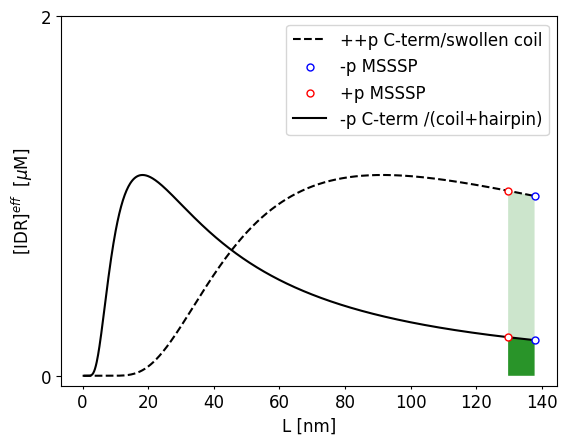

In [ ]:
plt.rcParams['font.size']=12
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
#['figure.figsize'] = 2,1


# C-terminus
res = 1
Lmin = res*Ang_per_res * Ang_to_nm  # tether length [nm]
#res = aaCterm
#Lmax = res*Ang_per_res * Ang_to_nm  # tether length [nm]
Lmax =tether_length[0] # extended
Ls = np.linspace(Lmin,Lmax,1000)

#L_per_res = 0.34 #nm
#zeta=3


ls = np.linspace(tether_length[1],tether_length[0],10)

# Flexible (e.g. Cterminal end is highly phosphorylated)
fig, ax1 = plt.subplots()
ys = (G_DZL(zeta,D,Ls)/ref_conc)*ref_unit
ax1.plot(Ls, ys,'k--',label='++p C-term/swollen coil')
conc = G_DZL(zeta,D,tether_length)
effective_conc = (conc/ref_conc)*ref_unit
ax1.scatter(tether_length[0],effective_conc[0],facecolor='white',edgecolor='blue',s=25,zorder=3,label='-p MSSSP')
ax1.scatter(tether_length[1],effective_conc[1],facecolor='white',edgecolor='red',s=25,zorder=3,label='+p MSSSP')

ys = (G_DZL(zeta,D,ls)/ref_conc)*ref_unit
ax1.fill_between(ls, ys, edgecolor='none',facecolor='green', alpha=0.2)

# Stiffer (C terminal comprises series of moderately-folded domains)
zetaS=zeta*5.
ys = (G_DZL(zetaS,D,Ls)/ref_conc)*ref_unit
ax1.plot(Ls, ys,'k-',label='-p C-term /(coil+hairpin)')
conc = G_DZL(zetaS,D,tether_length)
effective_conc = (conc/ref_conc)*ref_unit
ax1.scatter(tether_length[0],effective_conc[0],facecolor='white',edgecolor='blue',s=25,zorder=3)#,label='N-term')
ax1.scatter(tether_length[1],effective_conc[1],facecolor='white',edgecolor='red',s=25,zorder=3)#,label='C-term')

ys = (G_DZL(zetaS,D,ls)/ref_conc)*ref_unit
ax1.fill_between(ls, ys, edgecolor='none',facecolor='green', alpha=0.8)

#####
ax1.set_xlabel("L [nm]")#fontsize=8)
ax1.legend(
    #fontsize=10.5,
    loc=0)#(0.5,0.6), ncol=1)

#ax2.tick_params(labelsize=8)
#ax1.tick_params(labelsize=7)
ax1.set_ylabel("[IDR]$^{eff}$  [$\mu$M]")#,fontsize=8)
ax1.set_yticks([0,2])#,6,8,10])


plt.gcf().savefig("effconc.png",dpi=300)

Doing some back of the envelope calculations for the myofilament.
The N-terminal fragment of ABLIM1 is ca 97 a.a. A 100 aa fragment would be about 34 nm if end to end. In the WLC model, $R^2$ is 23 nm$^2$ or $R=4.8$.




In [ ]:
import numpy as np
aaNterm = 97
L_freeN = aaNterm * Ang_per_res * Ang_to_nm # M1-M98
print (L_freeN, " [nm]")
rsqd = RR_DZL(zeta,L_freeN)
print("R^2: %3.1f [nm]"%rsqd)
print("sqrt(R^2): %3.1f [nm]"%np.sqrt(rsqd))

32.980000000000004  [nm]
R^2: 22.8
sqrt(R^2): 4.8 [nm]


The entire sequence is about 780 a.a. Sqrt of the squared distance suggests an avg distance of 13.6 nm.  

In [ ]:
aaNterm = 780
L_freeN = aaNterm * Ang_per_res * Ang_to_nm # M1-M98
print (L_freeN, " [nm]")
rsqd = RR_DZL(zeta,L_freeN)
print("R^2: %3.1f [nm]"%rsqd)
print("sqrt(R^2): %3.1f [nm]"%np.sqrt(rsqd))

265.2  [nm]
R^2: 185.4 [nm]
sqrt(R^2): 13.6 [nm]
